<a href="https://colab.research.google.com/github/2021BUSTER/deep-learning_yerin/blob/main/20_2%EC%A0%84%EC%9D%B4%ED%95%99%EC%8A%B5_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 데이터 준비
from google.colab import files
uploaded = files.upload()

my_data = 'colab_train_test.zip'
!unzip colab_train_test.zip

Saving colab_train_test.zip to colab_train_test.zip
Archive:  colab_train_test.zip
   creating: test/ad/
  inflating: test/ad/ad_test_1.jpg   
  inflating: test/ad/ad_test_10.jpg  
  inflating: test/ad/ad_test_11.jpg  
  inflating: test/ad/ad_test_12.jpg  
  inflating: test/ad/ad_test_13.jpg  
  inflating: test/ad/ad_test_14.jpg  
  inflating: test/ad/ad_test_15.jpg  
  inflating: test/ad/ad_test_16.jpg  
  inflating: test/ad/ad_test_17.jpg  
  inflating: test/ad/ad_test_18.jpg  
  inflating: test/ad/ad_test_19.jpg  
  inflating: test/ad/ad_test_2.jpg   
  inflating: test/ad/ad_test_20.jpg  
  inflating: test/ad/ad_test_21.jpg  
  inflating: test/ad/ad_test_22.jpg  
  inflating: test/ad/ad_test_23.jpg  
  inflating: test/ad/ad_test_24.jpg  
  inflating: test/ad/ad_test_25.jpg  
  inflating: test/ad/ad_test_26.jpg  
  inflating: test/ad/ad_test_27.jpg  
  inflating: test/ad/ad_test_28.jpg  
  inflating: test/ad/ad_test_29.jpg  
  inflating: test/ad/ad_test_3.jpg   
  inflating: test/ad/

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input, models, layers, optimizers, metrics
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16

In [3]:
np.random.seed(3)
tf.random.set_seed(3)

train_datagen = ImageDataGenerator(rescale=1./255,          #범위 0~255 -> 0~1
                                  horizontal_flip=True,     #수평 대칭 이미지를 50% 확률로 만들어 추가
                                  width_shift_range=0.1,    #전체 크기의 10% 범위에서 좌우로 이동
                                  height_shift_range=0.1,   #전체 크기의 10% 범위에서 위, 아래로 이동
                                  fill_mode='nearest')      #이미지 변형 시 생기는 빈공간을 채우는 방식 선택(nearest가 가장 비슷한 색으로 채워줌)

train_generator = train_datagen.flow_from_directory(
       'train',                   #학습셋이 있는 폴더의 위치
       target_size=(150, 150),    #이미지 크기
       batch_size=5,
       class_mode='binary')       #2진 분류이므로 binary 모드로 설정

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
       'test',                  #테스트셋이 있는 폴더의 위치
       target_size=(150, 150),  #이미지 크기
       batch_size=5,
       class_mode='binary')     #2진 분류이므로 binary 모드로 설정

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [6]:
#미리 학습된 모델인 VGG16을 가져옴
transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
transfer_model.trainable = False #새롭게 학습하는게 아니므로 False로 설정
transfer_model.summary()

finetune_model = models.Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64, activation='relu'))
finetune_model.add(Dense(2, activation='softmax'))
finetune_model.summary()

finetune_model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

history = finetune_model.fit_generator(
       train_generator,
       steps_per_epoch=30,
       epochs=50,
       validation_data=test_generator,
       validation_steps=10)

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


30/30 [==============================] - 45s 1s/step - loss: 0.7280 - accuracy: 0.5673 - val_loss: 0.4876 - val_accuracy: 0.8200
Epoch 2/50
30/30 [==============================] - 44s 1s/step - loss: 0.4277 - accuracy: 0.8373 - val_loss: 0.3506 - val_accuracy: 0.9000
Epoch 3/50
30/30 [==============================] - 44s 1s/step - loss: 0.2881 - accuracy: 0.9189 - val_loss: 0.3183 - val_accuracy: 0.8600
Epoch 4/50
30/30 [==============================] - 44s 1s/step - loss: 0.2498 - accuracy: 0.9507 - val_loss: 0.2412 - val_accuracy: 0.8800
Epoch 5/50
30/30 [==============================] - 44s 1s/step - loss: 0.1957 - accuracy: 0.9603 - val_loss: 0.2330 - val_accuracy: 0.9200
Epoch 6/50
30/30 [==============================] - 44s 1s/step - loss: 0.1773 - accuracy: 0.9691 - val_loss: 0.1439 - val_accuracy: 0.9800
Epoch 7/50
30/30 [==============================] - 44s 1s/step - loss: 0.1559 - accuracy: 0.9378 - val_loss: 0.1499 - val_accuracy: 0.9400
Epoch 8/50
30/30 [=============

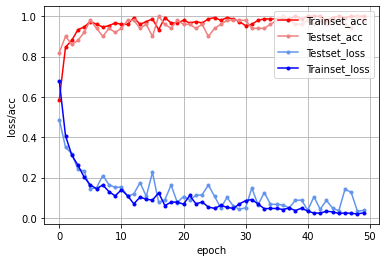

In [7]:
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()